<a href="https://colab.research.google.com/github/ripoll8/03MIAR-Algoritmos-de-optimizacion/blob/main/AG2_Daniel_Ripoll_Martin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AG2 - Actividad Guiada 2
Nombre: Daniel Ripoll Martín <br>
Link:   https://colab.research.google.com/drive/1g0XR5ZG5VyME99ZLYpXHKAlKvoY4YSIO?usp=sharing <br>
Github: https://github.com/ripoll8/03MIAR-Algoritmos-de-optimizacion
<br>




In [2]:
import math
import itertools

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

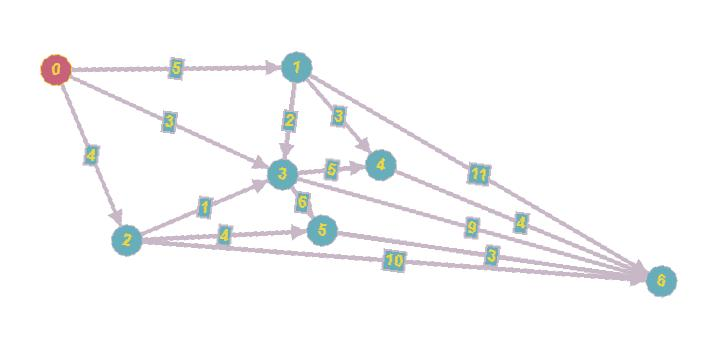

*Consideramos una tabla TARIFAS(i,j) para almacenar todos los precios que nos ofrecen los embarcaderos.<br>
*Si no es posible ir desde i a j daremos un valor alto para garantizar que ese trayecto no se va a elegir en la ruta óptima(modelado habitual para restricciones)

In [3]:
#Viaje por el rio - Programación dinámica
################################################################################

TARIFAS = [
[0,5,4,3,float("inf"),999,999],   #desde nodo 0
[999,0,999,2,3,999,11],  #desde nodo 1
[999,999, 0,1,999,4,10], #desde nodo 2
[999,999,999, 0,5,6,9],
[999,999, 999,999,0,999,4],
[999,999, 999,999,999,0,3],
[999,999,999,999,999,999,0]
]

#999 se puede sustituir por float("inf") del modulo math
TARIFAS

[[0, 5, 4, 3, inf, 999, 999],
 [999, 0, 999, 2, 3, 999, 11],
 [999, 999, 0, 1, 999, 4, 10],
 [999, 999, 999, 0, 5, 6, 9],
 [999, 999, 999, 999, 0, 999, 4],
 [999, 999, 999, 999, 999, 0, 3],
 [999, 999, 999, 999, 999, 999, 0]]

In [4]:
#Calculo de la matriz de PRECIOS y RUTAS
#  PRECIOS - contiene la matriz del mejor precio para ir de un nodo a otro
#  RUTAS   - contiene los nodos intermedios para ir de un nodo a otro
################################################################
def Precios(TARIFAS):
################################################################
  #Total de Nodos
  N = len(TARIFAS[0])

  #Inicialización de la tabla de precios
  PRECIOS = [ [9999]*N for i in [9999]*N]  #n x n
  RUTA = [ [""]*N for i in [""]*N]

  #Se recorren todos los nodos con dos bucles(origen - destino)
  #  para ir construyendo la matriz de PRECIOS
  for i in range(N-1):
    for j in range(i+1, N):
      MIN = TARIFAS[i][j]
      RUTA[i][j] = i

      for k in range(i, j):
        if PRECIOS[i][k] + TARIFAS[k][j] < MIN:
            MIN = min(MIN, PRECIOS[i][k] + TARIFAS[k][j] )
            RUTA[i][j] = k
        PRECIOS[i][j] = MIN

  return PRECIOS,RUTA

In [5]:
PRECIOS,RUTA = Precios(TARIFAS)
#print(PRECIOS[0][6])

print("PRECIOS")
for i in range(len(TARIFAS)):
  print(PRECIOS[i])

print("\nRUTA")
for i in range(len(TARIFAS)):
  print(RUTA[i])

PRECIOS
[9999, 5, 4, 3, 8, 8, 11]
[9999, 9999, 999, 2, 3, 8, 7]
[9999, 9999, 9999, 1, 6, 4, 7]
[9999, 9999, 9999, 9999, 5, 6, 9]
[9999, 9999, 9999, 9999, 9999, 999, 4]
[9999, 9999, 9999, 9999, 9999, 9999, 3]
[9999, 9999, 9999, 9999, 9999, 9999, 9999]

RUTA
['', 0, 0, 0, 1, 2, 5]
['', '', 1, 1, 1, 3, 4]
['', '', '', 2, 3, 2, 5]
['', '', '', '', 3, 3, 3]
['', '', '', '', '', 4, 4]
['', '', '', '', '', '', 5]
['', '', '', '', '', '', '']


In [6]:
#Calculo de la ruta usando la matriz RUTA
def calcular_ruta(RUTA, desde, hasta):
  if desde == RUTA[desde][hasta]:
  #if desde == hasta:
    #print("Ir a :" + str(desde))
    return desde
  else:
    return str(calcular_ruta(RUTA, desde, RUTA[desde][hasta])) +  ',' + str(RUTA[desde][hasta])

print("\nLa ruta es:")
calcular_ruta(RUTA, 0,6)


La ruta es:


'0,2,5'

## Problema de Asignacion de tarea

In [7]:
#Asignacion de tareas - Ramificación y Poda
################################################################################
#    T A R E A
#   A
#   G
#   E
#   N
#   T
#   E

COSTES=[[11,12,18,40],
        [14,15,13,22],
        [11,17,19,23],
        [17,14,20,28]]


In [8]:
#Calculo del valor de una solucion parcial
def valor(S,COSTES):
  VALOR = 0
  for i in range(len(S)):
    VALOR += COSTES[S[i]][i]
  return VALOR



valor((3,2,  ),COSTES)

34

In [9]:
#Coste inferior para soluciones parciales
#  (1,3,) Se asigna la tarea 1 al agente 0 y la tarea 3 al agente 1

def CI(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += min( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

def CS(S,COSTES):
  VALOR = 0
  #Valores establecidos
  for i in range(len(S)):
    VALOR += COSTES[i][S[i]]

  #Estimacion
  for i in range( len(S), len(COSTES)   ):
    VALOR += max( [ COSTES[j][i] for j in range(len(S), len(COSTES))  ])
  return VALOR

CI((0,1),COSTES)

68

In [10]:
#Genera tantos hijos como como posibilidades haya para la siguiente elemento de la tupla
#(0,) -> (0,1), (0,2), (0,3)
def crear_hijos(NODO, N):
  HIJOS = []
  for i in range(N ):
    if i not in NODO:
      HIJOS.append({'s':NODO +(i,)    })
  return HIJOS

In [11]:
crear_hijos((0,) , 4)

[{'s': (0, 1)}, {'s': (0, 2)}, {'s': (0, 3)}]

In [12]:
def ramificacion_y_poda(COSTES):
#Construccion iterativa de soluciones(arbol). En cada etapa asignamos un agente(ramas).
#Nodos del grafo  { s:(1,2),CI:3,CS:5  }
  #print(COSTES)
  DIMENSION = len(COSTES)
  MEJOR_SOLUCION=tuple( i for i in range(len(COSTES)) )
  CotaSup = valor(MEJOR_SOLUCION,COSTES)
  #print("Cota Superior:", CotaSup)

  NODOS=[]
  NODOS.append({'s':(), 'ci':CI((),COSTES)    } )

  iteracion = 0

  while( len(NODOS) > 0):
    iteracion +=1

    nodo_prometedor = [ min(NODOS, key=lambda x:x['ci']) ][0]['s']
    #print("Nodo prometedor:", nodo_prometedor)

    #Ramificacion
    #Se generan los hijos
    HIJOS =[ {'s':x['s'], 'ci':CI(x['s'], COSTES)   } for x in crear_hijos(nodo_prometedor, DIMENSION) ]

    #Revisamos la cota superior y nos quedamos con la mejor solucion si llegamos a una solucion final
    NODO_FINAL = [x for x in HIJOS if len(x['s']) == DIMENSION  ]
    if len(NODO_FINAL ) >0:
      #print("\n********Soluciones:",  [x for x in HIJOS if len(x['s']) == DIMENSION  ] )
      if NODO_FINAL[0]['ci'] < CotaSup:
        CotaSup = NODO_FINAL[0]['ci']
        MEJOR_SOLUCION = NODO_FINAL

    #Poda
    HIJOS = [x for x in HIJOS if x['ci'] < CotaSup   ]

    #Añadimos los hijos
    NODOS.extend(HIJOS)

    #Eliminamos el nodo ramificado
    NODOS =  [  x for x in NODOS if x['s'] != nodo_prometedor    ]

  print("La solucion final es:" ,MEJOR_SOLUCION , " en " , iteracion , " iteraciones" , " para dimension: " ,DIMENSION  )



ramificacion_y_poda(COSTES)

La solucion final es: [{'s': (1, 2, 0, 3), 'ci': 64}]  en  10  iteraciones  para dimension:  4


In [13]:
def fuerza_bruta(COSTES):

  mejor_valor = 10e10
  mejor_solucion = ()

  for s in list(itertools.permutations(range(len(COSTES)))):
    valor_tmp = valor(s, COSTES)
    if valor_tmp < mejor_valor:
      mejor_valor, mejor_solucion = valor_tmp, s

  print("La mejor solucion es: ", mejor_solucion, " con valor ", mejor_valor)

### Analisis para mejor nota


In [14]:
import random

random.seed(42)

def genera_costes_n_dimension(dimension):
  costes = [[random.randint(10,50) for i in range(dimension)] for j in range(dimension)]
  print(f"Costes: {costes}\n")
  return costes

def analiza_algoritmos(dimension):
  costes = genera_costes_n_dimension(dimension)
  print("Ramificacion y poda:")
  %timeit -n1 -r1 ramificacion_y_poda(costes)
  print("\nFuerza bruta")
  %timeit -n1 -r1 fuerza_bruta(costes)

In [16]:
for i in range(5,12):
  analiza_algoritmos(i)
  print("\n--------------------------------")

Costes: [[18, 26, 17, 16, 45], [19, 27, 28, 48, 23], [31, 23, 50, 26, 42], [41, 26, 13, 15, 50], [37, 27, 12, 10, 31]]

Ramificacion y poda:
La solucion final es: [{'s': (3, 0, 1, 2, 4), 'ci': 102}]  en  62  iteraciones  para dimension:  5
6.83 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Fuerza bruta
La mejor solucion es:  (0, 2, 3, 4, 1)  con valor  87
2.64 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

--------------------------------
Costes: [[18, 50, 26, 20, 38, 45], [37, 45, 10, 17, 14, 19], [44, 12, 33, 47, 45, 19], [37, 18, 12, 29, 33, 12], [32, 23, 25, 16, 32, 45], [36, 49, 19, 25, 20, 21]]

Ramificacion y poda:
La solucion final es: [{'s': (0, 2, 1, 5, 3, 4), 'ci': 88}]  en  45  iteraciones  para dimension:  6
1.05 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

Fuerza bruta
La mejor solucion es:  (0, 2, 1, 4, 5, 3)  con valor  88
887 µs ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

--------------------------------
Costes

In [ ]:
analiza_algoritmos(12)

Costes: [[14, 35, 41, 14, 46, 50, 13, 19, 19, 46, 29, 15], [25, 17, 45, 36, 48, 48, 49, 24, 43, 34, 38, 38], [29, 47, 37, 29, 46, 49, 13, 49, 16, 23, 50, 23], [26, 15, 20, 25, 21, 45, 14, 20, 10, 36, 38, 48], [40, 28, 12, 24, 28, 28, 39, 14, 24, 26, 50, 47], [22, 37, 17, 44, 24, 19, 27, 19, 14, 13, 20, 29], [48, 46, 28, 38, 17, 39, 29, 35, 27, 42, 44, 41], [38, 15, 48, 12, 37, 30, 48, 26, 11, 15, 24, 46], [47, 11, 27, 46, 12, 21, 40, 43, 38, 27, 21, 47], [37, 50, 41, 15, 40, 32, 36, 31, 30, 16, 20, 31], [36, 41, 28, 35, 45, 12, 39, 15, 30, 26, 30, 17], [35, 42, 10, 44, 39, 36, 13, 22, 43, 33, 49, 41]]

Ramificacion y poda:


Con dimensión 12 no podemos ejecutar ya que consumimos toda la capacidad de la RAM, por lo que a partir de este punto el algoritmo de ramificación y poda deja de ser válido.

Para dimensiones pequeñas hasta 8 observamos que el algoritmo de fuerza bruta es más eficiente que el de ramificación y poda, pero a partir de ese punto el tiempo de ejecución del algoritmo de fuerza bruta crece exponencialmente, por lo que deja de ser factible usarlo.

## Descenso del gradiente

In [2]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
#import scipy as sc

import random

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [3]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

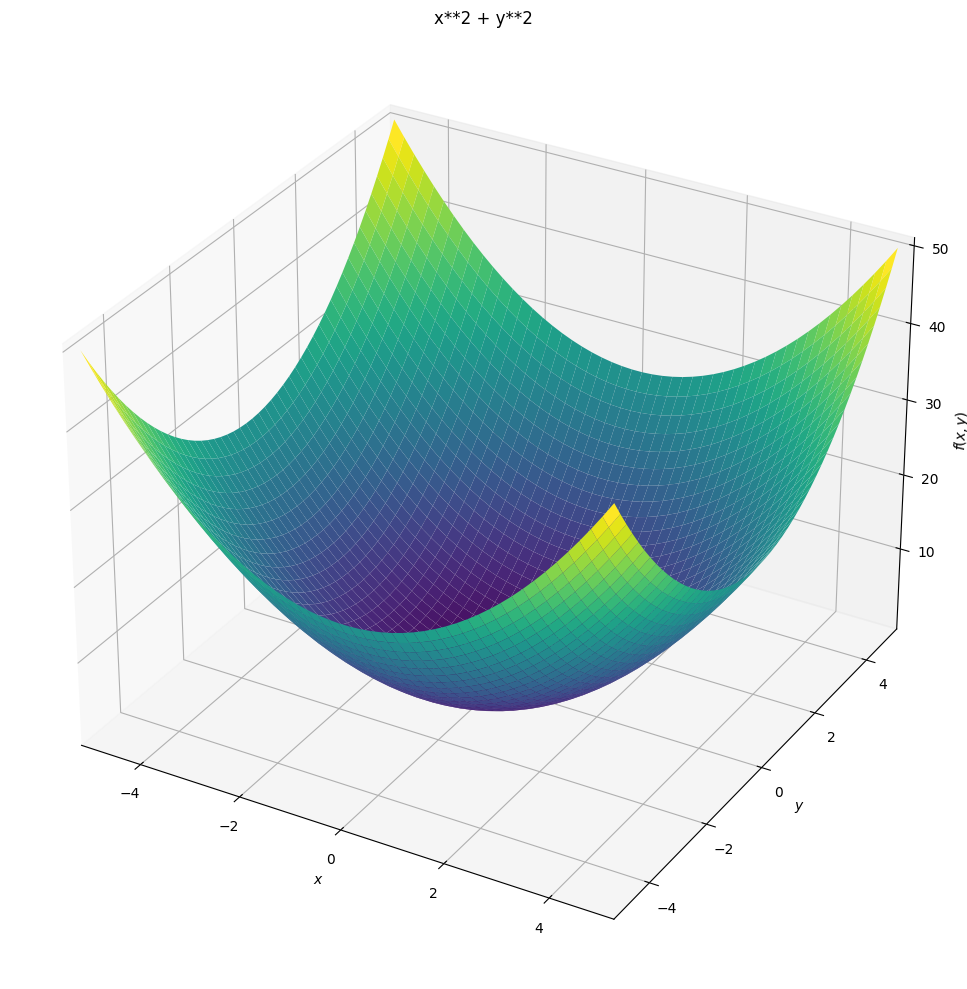

In [4]:
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

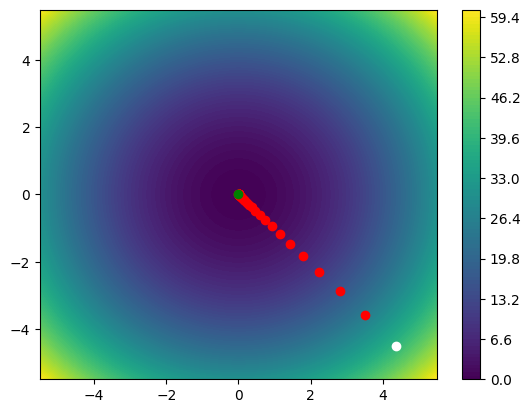

Solucion: [6.251010100465406e-05, -6.422854888096955e-05] 8.032819218967147e-09


In [5]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:50
for _ in range(50):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


**¿Te atreves a optimizar la función?:**

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$
<br>
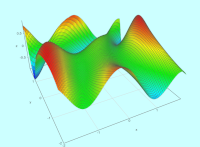


In [37]:
import sympy as sp
# Definimos la funcion a través de la librería de sympy
x,y = sp.symbols('x y')
f = sp.sin(1/2 * x**2 - 1/4 * y**2 + 3) *sp.cos(2*x + 1 - sp.exp(y) )
# Usamos la librería de sympy para derivar la función previamente definida
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)

print(f"df_dx = {df_dx}")
print(f"df_dy = {df_dy}")

df_dx = 1.0*x*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) - 2*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)
df_dy = -0.5*y*cos(2*x - exp(y) + 1)*cos(0.5*x**2 - 0.25*y**2 + 3) + exp(y)*sin(2*x - exp(y) + 1)*sin(0.5*x**2 - 0.25*y**2 + 3)


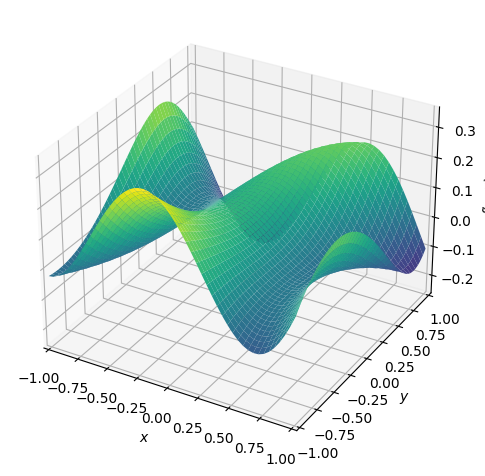

In [29]:
# Representamos la función
plot3d(f,(x,-1, 1),(y,-1, 1))

In [42]:
# Definimos la función para sustituir valores en f y df
def valor_df(x0):
  val_x = df_dx.subs([(x, x0[0]), (y, x0[1])])
  val_y = df_dy.subs([(x, x0[0]), (y, x0[1])])
  return np.array([val_x, val_y], dtype=float)

def valor_f(x0):
  val = f.subs([(x, x0[0]), (y, x0[1])])
  return float(val)

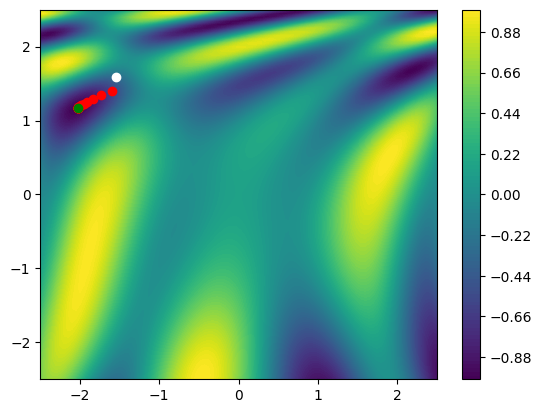

Solucion(x,y,z) = (-2.02765061781913, 1.171826836362924, -1.0)


In [46]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=2.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,val_x in enumerate(X):
  for iy,val_y in enumerate(Y):
    Z[iy,ix] = valor_f([val_x,val_y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-2,2  ),random.uniform(-2,2 ) ]
plt.plot(P[0],P[1],"o",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=.1

#Iteraciones:500
for _ in range(50):
  grad = valor_df(P)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print(f"Solucion(x,y,z) = ({P[0]}, {P[1]}, {valor_f(P)})")